### 池化层

池化层(pooling)，它的提出是**为了缓解卷积层对位置的过度敏感性.**

池化操作具体如下图:
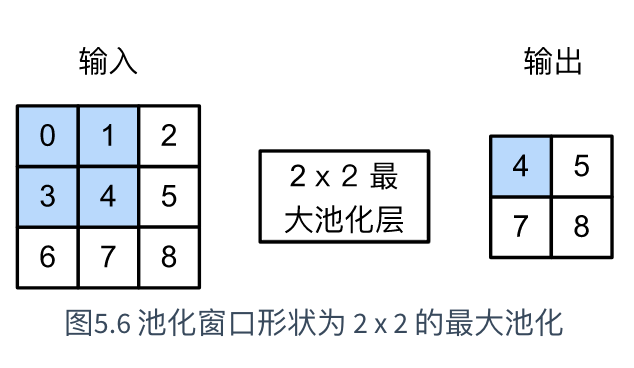

池化操作与卷积操作非常相同，池化操作进行的是求最大值或求平均值的操作。

同卷积层一样，池化层也可以在输入的高和宽两侧的填充并调整窗口的移动步幅来改变输出形状。

**在处理多通道输入数据时，池化层对每个输入通道分别池化，而不是像卷积层那样将各通道的输入按通道相加。** 这意味着池化层的输出通道数与输入通道数相等。

torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

* kernel_size:池化核大小
* stride:步幅，默认等于kernel_size
* padding:填充

#### 池化操作的简单实现

In [1]:
import torch
from torch import nn

def pool2d(X,pool_size,mode='max'):
    X=X.float()
    p_h,p_w=pool_size
    Y=torch.zeros((X.shape[0]-p_h+1,X.shape[1]-p_w+1),dtype=torch.float)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode=='max':
                Y[i,j]=X[i:i+p_h,j:j+p_w].max()
            elif mode=='avg':
                Y[i,j]=X[i:i+p_h,j:j+p_w].mean()
    return Y

In [2]:
X=torch.tensor([[0,1,2],[3,4,5],[6,7,8]])
pool2d(X,(2,2))

tensor([[4., 5.],
        [7., 8.]])

In [3]:
pool2d(X,(2,2),mode='avg')

tensor([[2., 3.],
        [5., 6.]])

#### MaxPool2d的应用实例

In [6]:
X=torch.arange(16,dtype=torch.float).view((1,1,4,4))
print(X.shape)
X=torch.cat((X,X+1),dim=1)
print(X.shape)

torch.Size([1, 1, 4, 4])
torch.Size([1, 2, 4, 4])


In [7]:
pool2d=nn.MaxPool2d(3,padding=1,stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])